## EDA to analyse the patterns present in the data. This will ensure that the applicants capable 
#of repaying the loan are not rejected.type of risk

    ##If the applicant is likely to repay the loan, then not approving the loan results in a loss 
    #of business to the company

    ##If the applicant is not likely to repay the loan, i.e. he/she is likely to default,
    #then approving the loan may lead to a financial loss for the company.

##Find out variables which are strong indicator of Defaulter.In other words, 
#the company wants to understand the driving factors (or driver variables) behind loan default,
#i.e. the variables which are strong indicators of default. The company can utilise this 
#knowledge for its portfolio and risk assessment.

##data imbalance in the data

Given :--> two Data Set:
###Application data Contains all the information of the client at the time of application. 
#The data is about whether a client has payment difficulties.Target column (1)

###Previous_Apllication_data contains information about the client’s previous loan data. (NameContract Status) #It contains the data on whether the previous application
#had been Approved, Cancelled, Refused or Unused offer


In [1]:
#import the warnings.
import warnings
warnings.filterwarnings("ignore")

In [2]:
#import IMP directory
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
###to display all the columns and rows####
#pd.set_option("display.max_rows",300)
#pd.set_option("display.max_columns",150)

In [3]:
pd.set_option("max_info_columns",300)
Apl_data=pd.read_csv('application_data.csv')
# taking insight
Apl_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [4]:
Apl_data.shape#(307511, 122)
column1=Apl_data.columns
Apl_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Non-Null Count   Dtype  
---   ------                        --------------   -----  
 0    SK_ID_CURR                    307511 non-null  int64  
 1    TARGET                        307511 non-null  int64  
 2    NAME_CONTRACT_TYPE            307511 non-null  object 
 3    CODE_GENDER                   307511 non-null  object 
 4    FLAG_OWN_CAR                  307511 non-null  object 
 5    FLAG_OWN_REALTY               307511 non-null  object 
 6    CNT_CHILDREN                  307511 non-null  int64  
 7    AMT_INCOME_TOTAL              307511 non-null  float64
 8    AMT_CREDIT                    307511 non-null  float64
 9    AMT_ANNUITY                   307499 non-null  float64
 10   AMT_GOODS_PRICE               307233 non-null  float64
 11   NAME_TYPE_SUITE               306219 non-null  object 
 12   NAME_INCOME_TYPE            

In [5]:
100*Apl_data.isnull().mean().sort_values(ascending=False)

COMMONAREA_MEDI                 69.872297
COMMONAREA_AVG                  69.872297
COMMONAREA_MODE                 69.872297
NONLIVINGAPARTMENTS_MODE        69.432963
NONLIVINGAPARTMENTS_AVG         69.432963
NONLIVINGAPARTMENTS_MEDI        69.432963
FONDKAPREMONT_MODE              68.386172
LIVINGAPARTMENTS_MODE           68.354953
LIVINGAPARTMENTS_AVG            68.354953
LIVINGAPARTMENTS_MEDI           68.354953
FLOORSMIN_AVG                   67.848630
FLOORSMIN_MODE                  67.848630
FLOORSMIN_MEDI                  67.848630
YEARS_BUILD_MEDI                66.497784
YEARS_BUILD_MODE                66.497784
YEARS_BUILD_AVG                 66.497784
OWN_CAR_AGE                     65.990810
LANDAREA_MEDI                   59.376738
LANDAREA_MODE                   59.376738
LANDAREA_AVG                    59.376738
BASEMENTAREA_MEDI               58.515956
BASEMENTAREA_AVG                58.515956
BASEMENTAREA_MODE               58.515956
EXT_SOURCE_1                    56

##Data have lot of missing data.. but all the Datatypes are correct so focus on Missing data further
#### 1. Handling Missing values

Observations:

Sοme cοlumns in the dataset have missing values(Null_Col). We are gοing tο remοve cοlumns with high missing values percentage We are cοnsidering the threashοld value as 40%.


In [6]:

Null_Col_Drop=[columns for columns in Apl_data.columns if Apl_data[columns].isnull().mean()>0.40]
Null_Col_Drop
Apl_data.drop(columns=Null_Col_Drop,axis=1,inplace=True)

In [7]:
100*Apl_data.isnull().mean().sort_values(ascending=False)## checking the remaining  null column

OCCUPATION_TYPE                31.345545
EXT_SOURCE_3                   19.825307
AMT_REQ_CREDIT_BUREAU_YEAR     13.501631
AMT_REQ_CREDIT_BUREAU_QRT      13.501631
AMT_REQ_CREDIT_BUREAU_MON      13.501631
AMT_REQ_CREDIT_BUREAU_WEEK     13.501631
AMT_REQ_CREDIT_BUREAU_DAY      13.501631
AMT_REQ_CREDIT_BUREAU_HOUR     13.501631
NAME_TYPE_SUITE                 0.420148
OBS_30_CNT_SOCIAL_CIRCLE        0.332021
DEF_30_CNT_SOCIAL_CIRCLE        0.332021
OBS_60_CNT_SOCIAL_CIRCLE        0.332021
DEF_60_CNT_SOCIAL_CIRCLE        0.332021
EXT_SOURCE_2                    0.214626
AMT_GOODS_PRICE                 0.090403
AMT_ANNUITY                     0.003902
CNT_FAM_MEMBERS                 0.000650
DAYS_LAST_PHONE_CHANGE          0.000325
FLAG_DOCUMENT_17                0.000000
FLAG_DOCUMENT_18                0.000000
FLAG_DOCUMENT_21                0.000000
FLAG_DOCUMENT_20                0.000000
FLAG_DOCUMENT_19                0.000000
FLAG_DOCUMENT_2                 0.000000
FLAG_DOCUMENT_3 

In [8]:
Null_Col=[columns for columns in Apl_data.columns if Apl_data[columns].isnull().mean()>0]
Null_Col# col which have Null values

['AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_TYPE_SUITE',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR']

## Impute the Numerical (countinous Variable) for missing values with the Median

#for Numerical variable if it have outlier changing with median is good as it is least effected by Outliers

##if it do not have outlier mean or median both are almost equal change with any.

#so best is to change it with Median in both the cases.
checkd this cmd and then applying for loop
#Median_value=Apl_data['AMT_ANNUITY'].median() #Apl_data['AMT_ANNUITY']=Apl_data['AMT_ANNUITY'].fillna(Median_value)


In [9]:
## IMPUTING the NA of continuous( dtype!=object ) variable with the MEDIAN
for column in Null_Col :
    if (Apl_data[column].dtype!=object) & (Apl_data[column].isnull().mean()*100!=0):
        #print(column)
        Median_value=Apl_data[column].median()
        #print(Median_value)
        Apl_data[column]=Apl_data[column].fillna(Median_value)      

In [10]:
100*Apl_data.isnull().mean().sort_values(ascending=False)## checking the remaining  null column

OCCUPATION_TYPE                31.345545
NAME_TYPE_SUITE                 0.420148
SK_ID_CURR                      0.000000
FLAG_DOCUMENT_8                 0.000000
FLAG_DOCUMENT_7                 0.000000
FLAG_DOCUMENT_6                 0.000000
FLAG_DOCUMENT_5                 0.000000
FLAG_DOCUMENT_4                 0.000000
FLAG_DOCUMENT_3                 0.000000
FLAG_DOCUMENT_2                 0.000000
FLAG_DOCUMENT_10                0.000000
DAYS_LAST_PHONE_CHANGE          0.000000
DEF_60_CNT_SOCIAL_CIRCLE        0.000000
OBS_60_CNT_SOCIAL_CIRCLE        0.000000
DEF_30_CNT_SOCIAL_CIRCLE        0.000000
OBS_30_CNT_SOCIAL_CIRCLE        0.000000
EXT_SOURCE_3                    0.000000
EXT_SOURCE_2                    0.000000
FLAG_DOCUMENT_9                 0.000000
FLAG_DOCUMENT_11                0.000000
LIVE_CITY_NOT_WORK_CITY         0.000000
FLAG_DOCUMENT_20                0.000000
AMT_REQ_CREDIT_BUREAU_QRT       0.000000
AMT_REQ_CREDIT_BUREAU_MON       0.000000
AMT_REQ_CREDIT_B

## Imputing the missing value of Categorical variable 

In [11]:

#NAME_TYPE_SUITE 0.420148   Obj col## changing it with mode as too less percentage so have no such impact

Apl_data.NAME_TYPE_SUITE.value_counts()##Analysisng
#Unaccompanied      248526
#Family              40149
#Spouse, partner     11370
#Children             3267
#Other_B              1770
#Other_A               866
#Group of people       271 
Mode_value=Apl_data['NAME_TYPE_SUITE'].mode()[0]
Apl_data['NAME_TYPE_SUITE']=Apl_data['NAME_TYPE_SUITE'].fillna(Mode_value,axis=0)
100*Apl_data.isnull().mean().sort_values(ascending=False)


OCCUPATION_TYPE                31.345545
SK_ID_CURR                      0.000000
FLAG_DOCUMENT_9                 0.000000
FLAG_DOCUMENT_7                 0.000000
FLAG_DOCUMENT_6                 0.000000
FLAG_DOCUMENT_5                 0.000000
FLAG_DOCUMENT_4                 0.000000
FLAG_DOCUMENT_3                 0.000000
FLAG_DOCUMENT_2                 0.000000
DAYS_LAST_PHONE_CHANGE          0.000000
DEF_60_CNT_SOCIAL_CIRCLE        0.000000
OBS_60_CNT_SOCIAL_CIRCLE        0.000000
DEF_30_CNT_SOCIAL_CIRCLE        0.000000
OBS_30_CNT_SOCIAL_CIRCLE        0.000000
EXT_SOURCE_3                    0.000000
EXT_SOURCE_2                    0.000000
ORGANIZATION_TYPE               0.000000
FLAG_DOCUMENT_8                 0.000000
FLAG_DOCUMENT_10                0.000000
REG_CITY_NOT_WORK_CITY          0.000000
FLAG_DOCUMENT_11                0.000000
AMT_REQ_CREDIT_BUREAU_QRT       0.000000
AMT_REQ_CREDIT_BUREAU_MON       0.000000
AMT_REQ_CREDIT_BUREAU_WEEK      0.000000
AMT_REQ_CREDIT_B

In [12]:
Apl_data['OCCUPATION_TYPE'].nunique()##18
Apl_data['OCCUPATION_TYPE'].unique()
#['Laborers', 'Core staff', 'Accountants', 'Managers', nan,'Drivers', 'Sales staff', 'Cleaning staff', 'Cooking staff','Private service staff', 'Medicine staff', 'Security staff','High skill tech staff', 'Waiters/barmen staff','Low-skill Laborers', 'Realty agents', 'Secretaries', 'IT staff','HR staff']
Apl_data['OCCUPATION_TYPE'].value_counts(normalize=True)#nan value is very high 31 % so  not fill it in
#OCCUPATION_TYPE                31.345545


Laborers                 0.261396
Sales staff              0.152056
Core staff               0.130589
Managers                 0.101227
Drivers                  0.088116
High skill tech staff    0.053903
Accountants              0.046481
Medicine staff           0.040437
Security staff           0.031835
Cooking staff            0.028164
Cleaning staff           0.022040
Private service staff    0.012562
Low-skill Laborers       0.009914
Waiters/barmen staff     0.006385
Secretaries              0.006181
Realty agents            0.003557
HR staff                 0.002667
IT staff                 0.002491
Name: OCCUPATION_TYPE, dtype: float64

<AxesSubplot: >

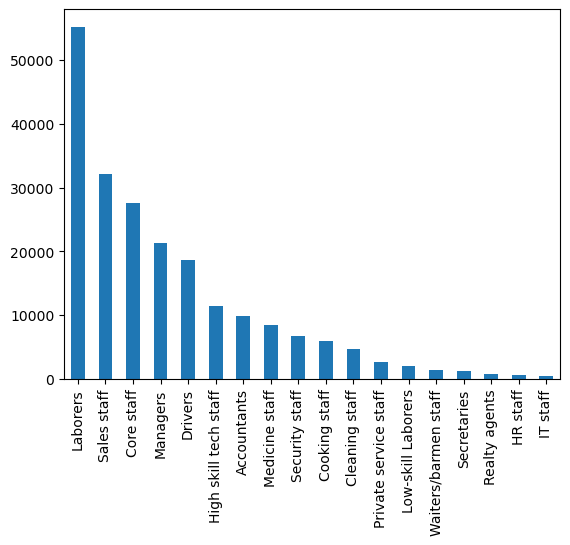

In [13]:
Apl_data['OCCUPATION_TYPE'].value_counts().plot.bar()


<AxesSubplot: >

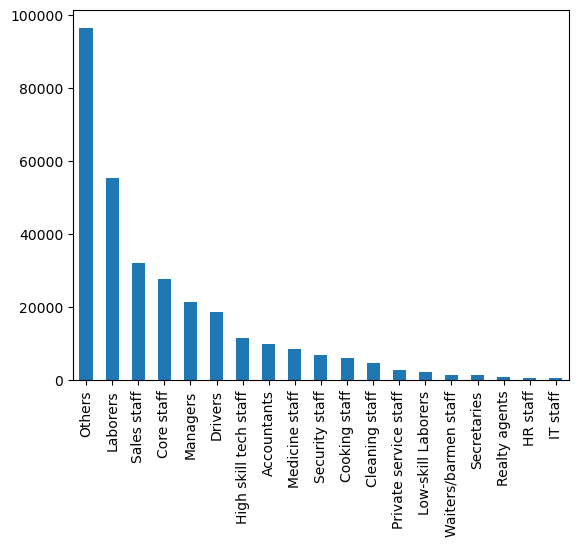

In [14]:
#OCCUPATION_TYPE 31.345545   Obj col## creating other category as it is an important and have 
#very high value just not deletig as it will be in mind
Apl_data['OCCUPATION_TYPE']=Apl_data['OCCUPATION_TYPE'].fillna('Others',axis=0)
Apl_data[Apl_data['OCCUPATION_TYPE']=='Others']
Apl_data['OCCUPATION_TYPE'].value_counts().plot.bar()

## looking for Outliers in Variable
## Univariate Analysis:-->

In [15]:
Apl_data.nunique()
Apl_data.columns
#Continuous
#These are numerical columns and may contain so many values like age, salary, height etc
cont_var=['AMT_INCOME_TOTAL','AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',  'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE',]
#Categorical
#These are columns contains categories with very few unique values like gender, type of city
cat_var=['TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER','FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE','FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3',
       'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9',
       'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15',
       'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']
ID=['SK_ID_CURR']
##Verifying my work
print(len(set(cont_var))+len(set(cat_var))+len(set(ID)))
#print('Countinous Var:',cont_var)
#print('-'*180)
#print('Categoriacle Var:',cat_var)
#print('-'*180)
print(Apl_data.shape)


73
(307511, 73)


## CONTINUOS VARIABLE

************************************************************
Analysing outliers for  AMT_INCOME_TOTAL
************************************************************
count       307511.000000
mean        168797.919297
std         237123.146279
min          25650.000000
25%         112500.000000
50%         147150.000000
75%         202500.000000
max      117000000.000000
Name: AMT_INCOME_TOTAL, dtype: object
************************************************************


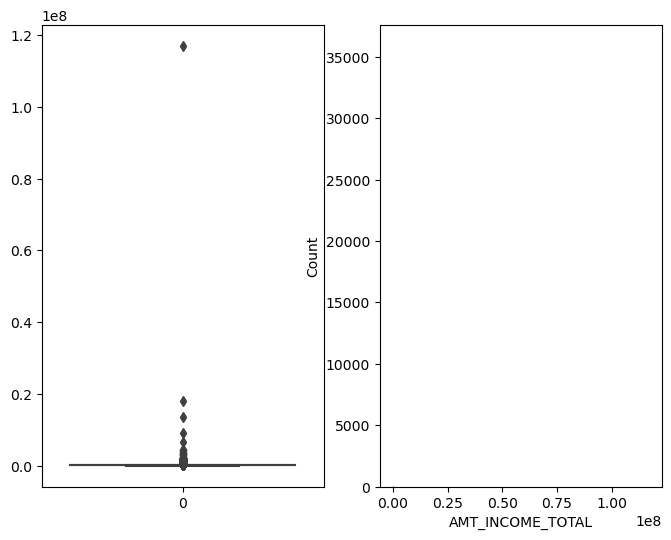

************************************************************
Analysing outliers for  AMT_CREDIT
************************************************************
count     307511.000000
mean      599025.999706
std       402490.776996
min        45000.000000
25%       270000.000000
50%       513531.000000
75%       808650.000000
max      4050000.000000
Name: AMT_CREDIT, dtype: object
************************************************************


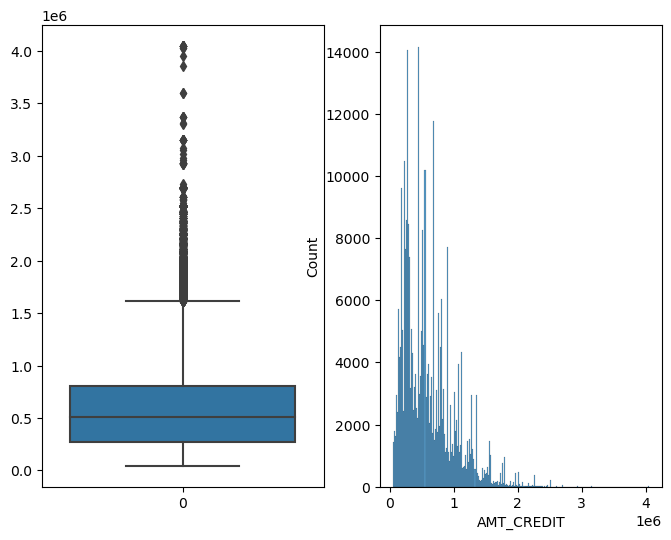

************************************************************
Analysing outliers for  AMT_ANNUITY
************************************************************
count    307511.000000
mean      27108.487841
std       14493.461065
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: object
************************************************************


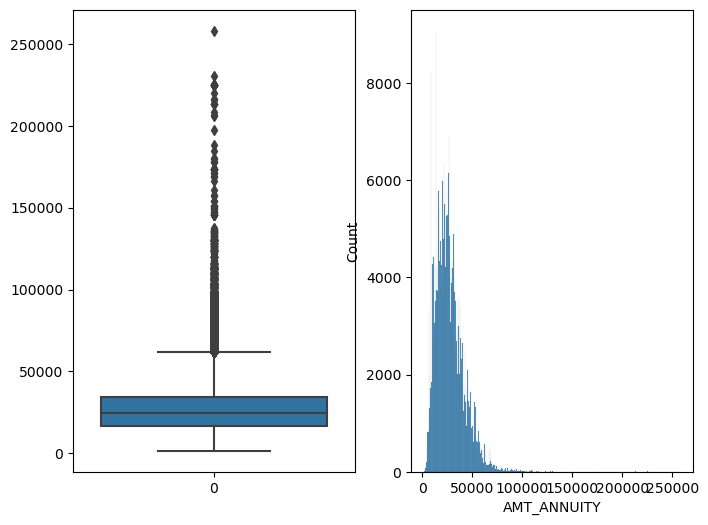

************************************************************
Analysing outliers for  AMT_GOODS_PRICE
************************************************************
count     307511.000000
mean      538316.294367
std       369288.982246
min        40500.000000
25%       238500.000000
50%       450000.000000
75%       679500.000000
max      4050000.000000
Name: AMT_GOODS_PRICE, dtype: object
************************************************************


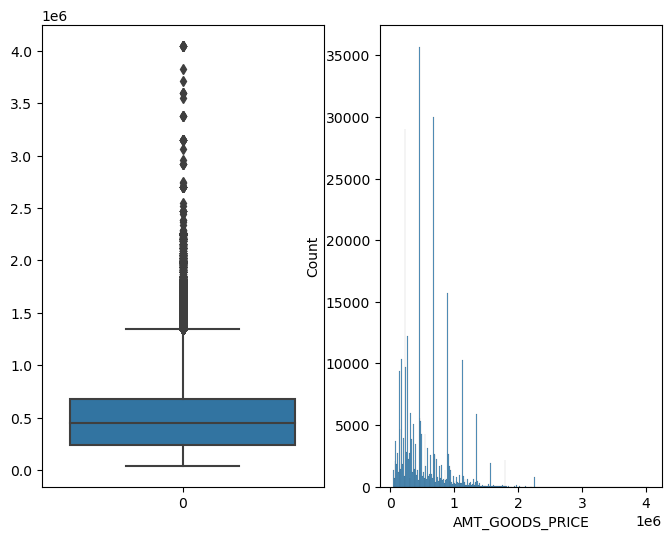

************************************************************
Analysing outliers for  DAYS_BIRTH
************************************************************
count    307511.000000
mean     -16036.995067
std        4363.988632
min      -25229.000000
25%      -19682.000000
50%      -15750.000000
75%      -12413.000000
max       -7489.000000
Name: DAYS_BIRTH, dtype: object
************************************************************


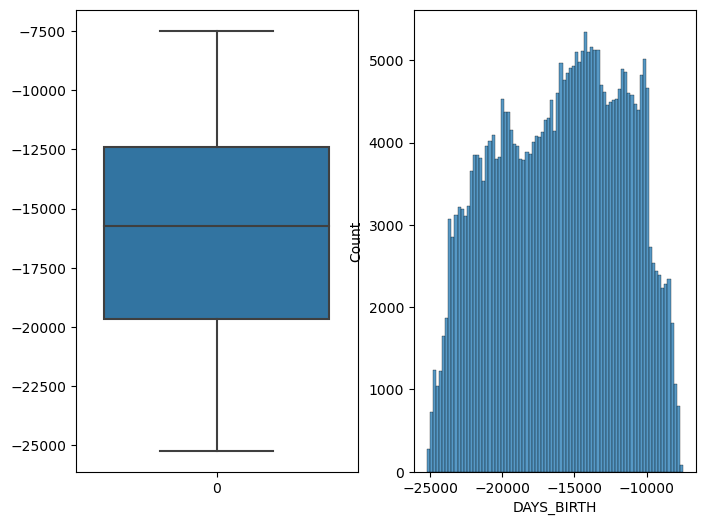

************************************************************
Analysing outliers for  DAYS_EMPLOYED
************************************************************
count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: object
************************************************************


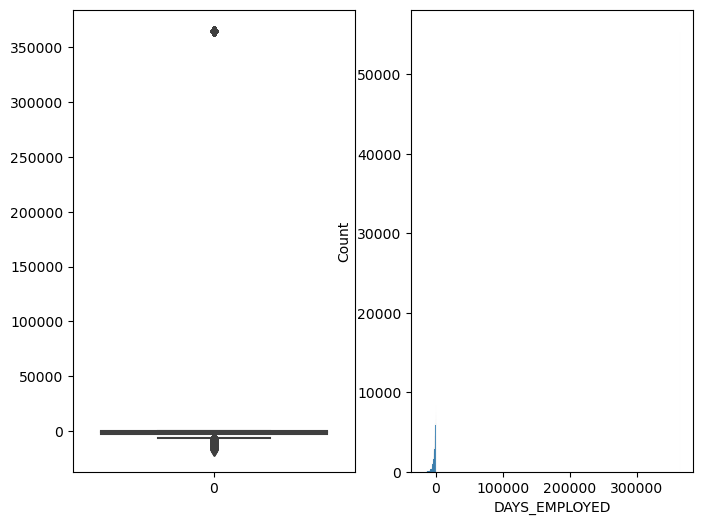

************************************************************
Analysing outliers for  DAYS_REGISTRATION
************************************************************
count    307511.000000
mean      -4986.120328
std        3522.886321
min      -24672.000000
25%       -7479.500000
50%       -4504.000000
75%       -2010.000000
max           0.000000
Name: DAYS_REGISTRATION, dtype: object
************************************************************


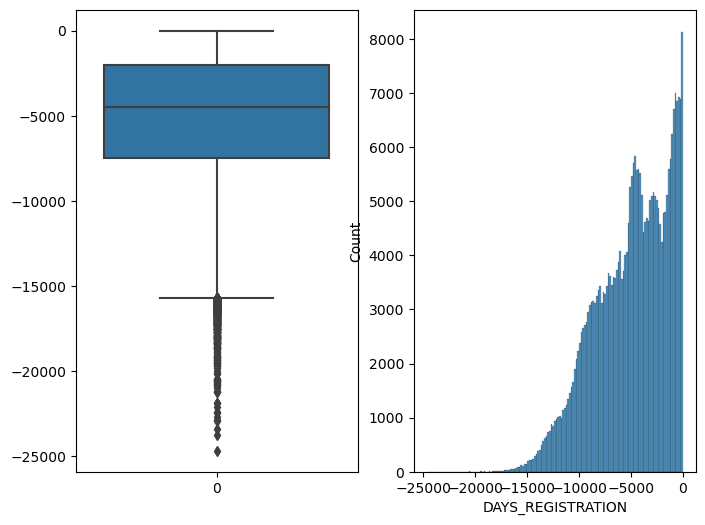

************************************************************
Analysing outliers for  DAYS_ID_PUBLISH
************************************************************
count    307511.000000
mean      -2994.202373
std        1509.450419
min       -7197.000000
25%       -4299.000000
50%       -3254.000000
75%       -1720.000000
max           0.000000
Name: DAYS_ID_PUBLISH, dtype: object
************************************************************


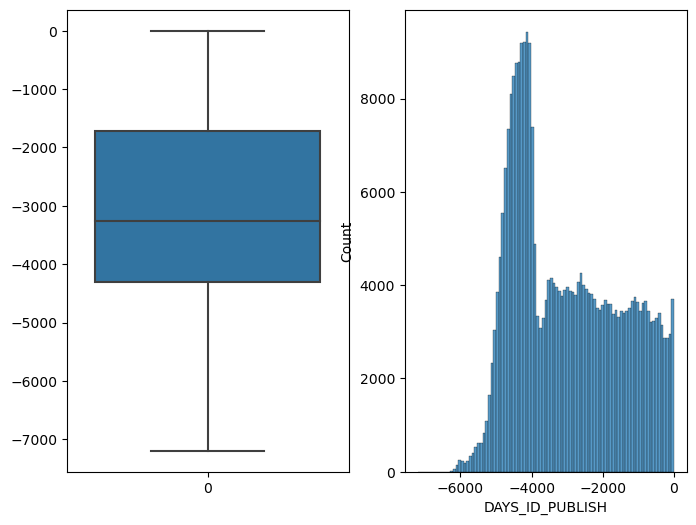

************************************************************
Analysing outliers for  EXT_SOURCE_2
************************************************************
count    307511.000000
mean          0.514503
std           0.190870
min           0.000000
25%           0.392974
50%           0.565961
75%           0.663422
max           0.855000
Name: EXT_SOURCE_2, dtype: object
************************************************************


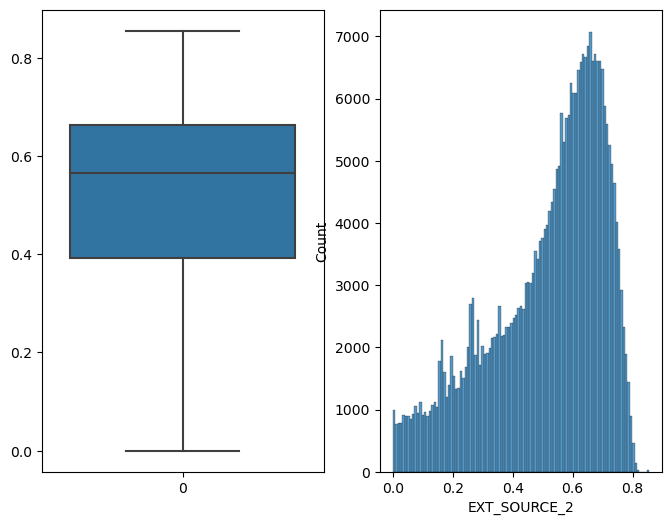

************************************************************
Analysing outliers for  EXT_SOURCE_3
************************************************************
count    307511.000000
mean          0.515695
std           0.174736
min           0.000527
25%           0.417100
50%           0.535276
75%           0.636376
max           0.896010
Name: EXT_SOURCE_3, dtype: object
************************************************************


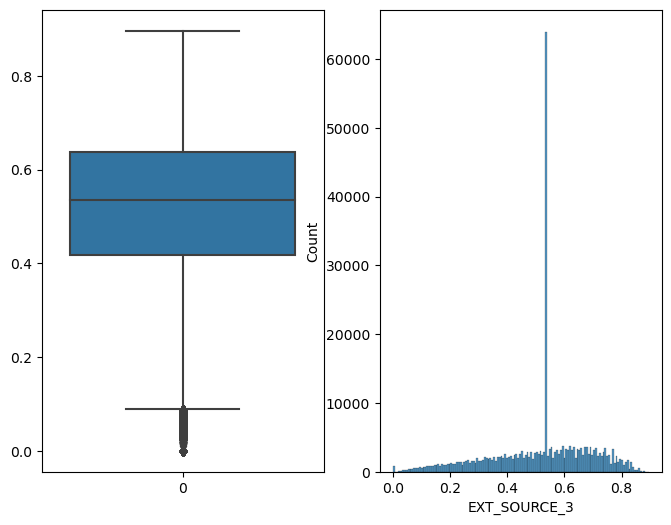

************************************************************
Analysing outliers for  OBS_30_CNT_SOCIAL_CIRCLE
************************************************************
count    307511.000000
mean          1.417523
std           2.398395
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max         348.000000
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: object
************************************************************


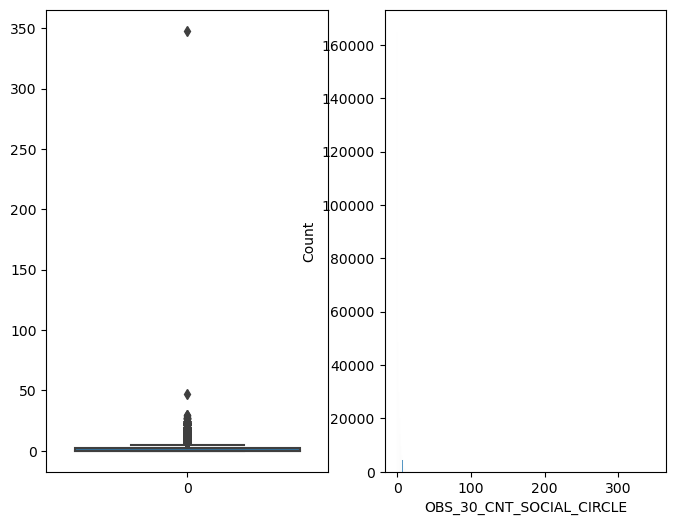

************************************************************
Analysing outliers for  DEF_30_CNT_SOCIAL_CIRCLE
************************************************************
count    307511.000000
mean          0.142944
std           0.446033
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          34.000000
Name: DEF_30_CNT_SOCIAL_CIRCLE, dtype: object
************************************************************


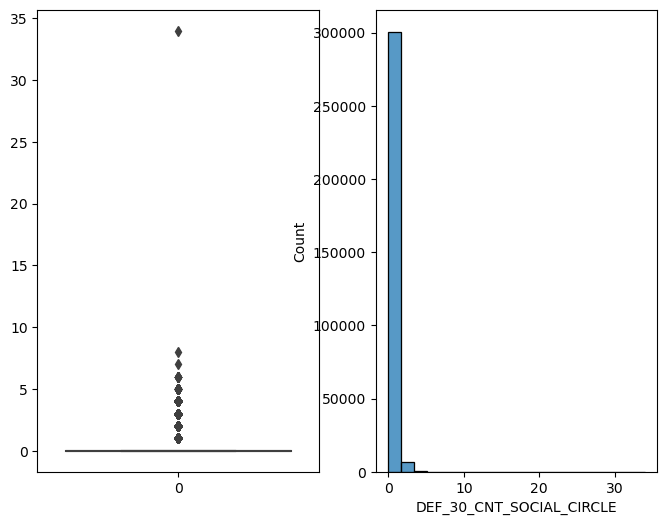

************************************************************
Analysing outliers for  OBS_60_CNT_SOCIAL_CIRCLE
************************************************************
count    307511.000000
mean          1.400626
std           2.377224
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max         344.000000
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: object
************************************************************


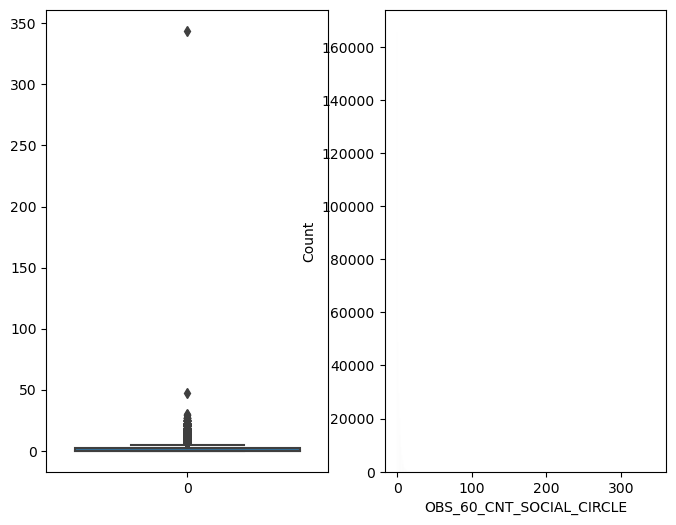

************************************************************
Analysing outliers for  DEF_60_CNT_SOCIAL_CIRCLE
************************************************************
count    307511.000000
mean          0.099717
std           0.361735
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          24.000000
Name: DEF_60_CNT_SOCIAL_CIRCLE, dtype: object
************************************************************


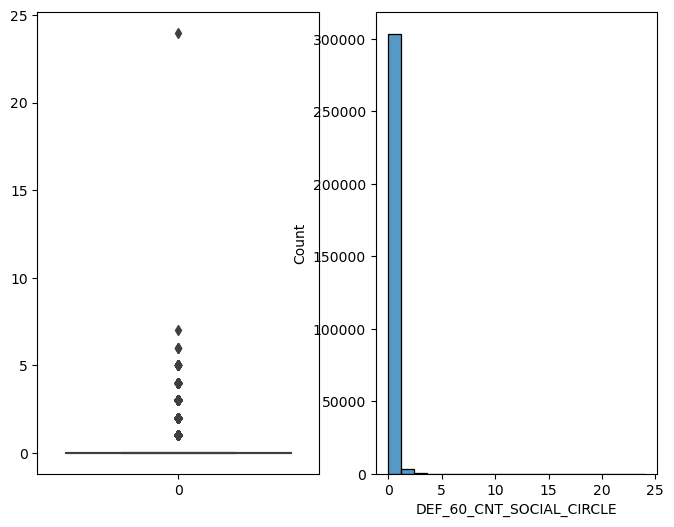

************************************************************
Analysing outliers for  DAYS_LAST_PHONE_CHANGE
************************************************************
count    307511.000000
mean       -962.858119
std         826.807226
min       -4292.000000
25%       -1570.000000
50%        -757.000000
75%        -274.000000
max           0.000000
Name: DAYS_LAST_PHONE_CHANGE, dtype: object
************************************************************


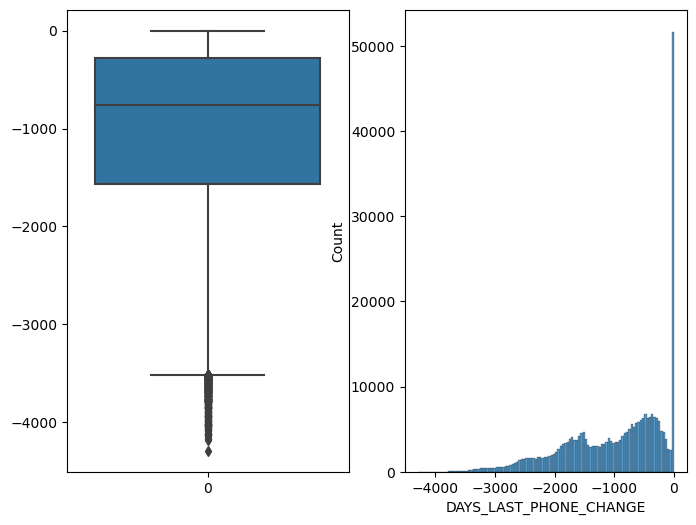

In [16]:
## Countinous variable plotting all together a histogram  its boxplot and looking its values 
for i in cont_var:
    plt.figure(figsize=[8,6])
    print('*'*60)
    print('Analysing outliers for ',i)
    print('*'*60)
    print(Apl_data[i].describe().apply(lambda x: format(x, 'f')))
    print('*'*60)
    plt.subplot(1,2,1)
    sns.boxplot(Apl_data[i])
    plt.subplot(1,2,2)
    sns.histplot(Apl_data[i])
   
    
    plt.show()
    


INFERENCE:-
- AMT_ANNUITY, AMT_CREDIT, AMT_GOODS_PRICE,CNT_CHILDREN have some number of outliers.
- AMT_INCOME_TOTAL has huge number of outliers which indicate that few of the loan applicants have high income when compared to the others.
- DAYS_BIRTH has no outliers which means the data available is reliable.
- DAYS_EMPLOYED,DAYS_BIRTH(DAYS_BIRTH,DAYS_EMPLOYED,having -ive value and converting in to years and take in to AGE Column.
- DAYS_EMPLOYED has outlier values around 350000(days) which is around 958 years which is impossible and hence this has to be incorrect entry.
- We can see the stats for these columns below as well

7 Cell  for analysing the Outlier why and what can be Done on 'AMT_INCOME_TOTAL'

************************************************************
Analysing outliers for  AMT_INCOME_TOTAL
************************************************************
count       307511.000000
mean        168797.919297
std         237123.146279
min          25650.000000
25%         112500.000000
50%         147150.000000
75%         202500.000000
max      117000000.000000
Name: AMT_INCOME_TOTAL, dtype: object
************************************************************


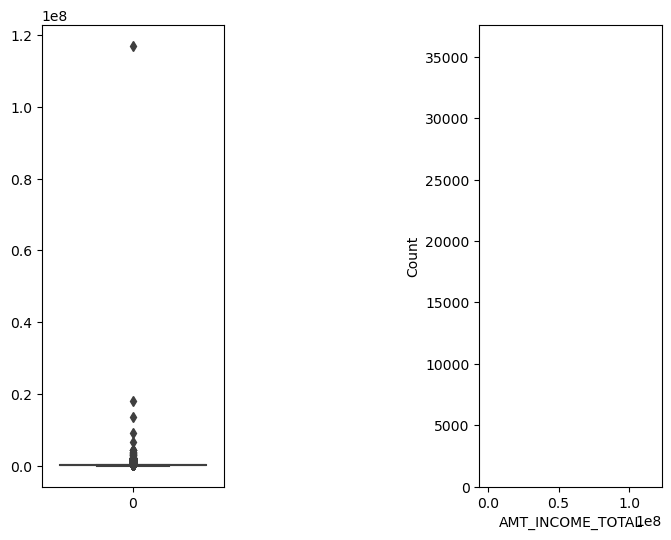

In [17]:
## Variables which have outliers 'AMT_INCOME_TOTAL(very high),Income can be high
#75%         202500.000000
#max      117000000.000000
#lots of optiong to look after the outlier 
#>> imputing ti median,deletting the outlier, binning the outlier, capping the outlier , IQR

plt.figure(figsize=[8,6])
print('*'*60)
print('Analysing outliers for ','AMT_INCOME_TOTAL')
print('*'*60)
print(Apl_data['AMT_INCOME_TOTAL'].describe().apply(lambda x:format(x,'f')))
print('*'*60)
plt.subplot(1,3,1)
sns.boxplot(Apl_data['AMT_INCOME_TOTAL'])
plt.subplot(1,3,3)
sns.histplot(Apl_data['AMT_INCOME_TOTAL'])
plt.show()

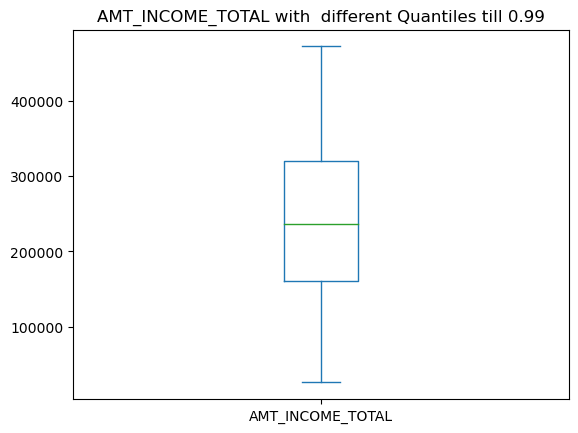

In [18]:
## looking its different quantile
Apl_data['AMT_INCOME_TOTAL'].quantile([0,0.5,0.75,0.90,0.95,0.99]).plot.box()
plt.title('AMT_INCOME_TOTAL with  different Quantiles till 0.99')

plt.show()


In [19]:
##exploring where the outlier  work and there occupation
Apl_data['NAME_INCOME_TYPE'][Apl_data['AMT_INCOME_TOTAL']> 502500.0].value_counts()

#Apl_data['NAME_INCOME_TYPE'][Apl_data['YEAR_EMPLOYED']>1000].value_counts()


Commercial associate    1494
Working                  836
State servant            207
Pensioner                159
Businessman                5
Student                    1
Name: NAME_INCOME_TYPE, dtype: int64

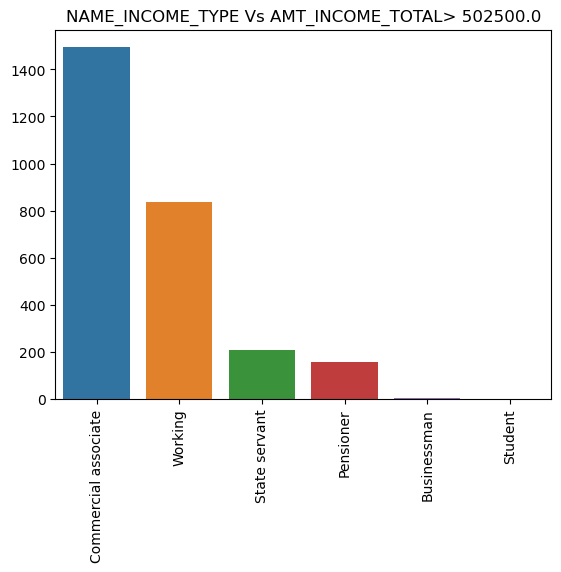

In [20]:
x=Apl_data['NAME_INCOME_TYPE'][Apl_data['AMT_INCOME_TOTAL']> 502500.0].value_counts().index
y=Apl_data['NAME_INCOME_TYPE'][Apl_data['AMT_INCOME_TOTAL']> 502500.0].value_counts().values
sns.barplot(x=x,y=y)
plt.xticks(rotation=90)
plt.title('NAME_INCOME_TYPE Vs AMT_INCOME_TOTAL> 502500.0')

plt.show()

INCOME TYPE IS :
Commercial associate    1494
Working                  836
State servant            207
Pensioner                159
Businessman                5
Student                    1
OCCUPATION TYPE IS:
Managers                 1193
Others                    579
Core staff                239
Laborers                  155
Accountants               140
Sales staff               116
High skill tech staff      98
Drivers                    89
Medicine staff             19
IT staff                   19
Private service staff      18
Secretaries                 9
Security staff              8
Cleaning staff              6
HR staff                    5
Realty agents               4
Cooking staff               3
Waiters/barmen staff        2
TARGET BSED
0    2556
1     146

In [21]:
Apl_data['OCCUPATION_TYPE'][Apl_data['AMT_INCOME_TOTAL']> 502500.0].value_counts()

Managers                 1193
Others                    579
Core staff                239
Laborers                  155
Accountants               140
Sales staff               116
High skill tech staff      98
Drivers                    89
Medicine staff             19
IT staff                   19
Private service staff      18
Secretaries                 9
Security staff              8
Cleaning staff              6
HR staff                    5
Realty agents               4
Cooking staff               3
Waiters/barmen staff        2
Name: OCCUPATION_TYPE, dtype: int64

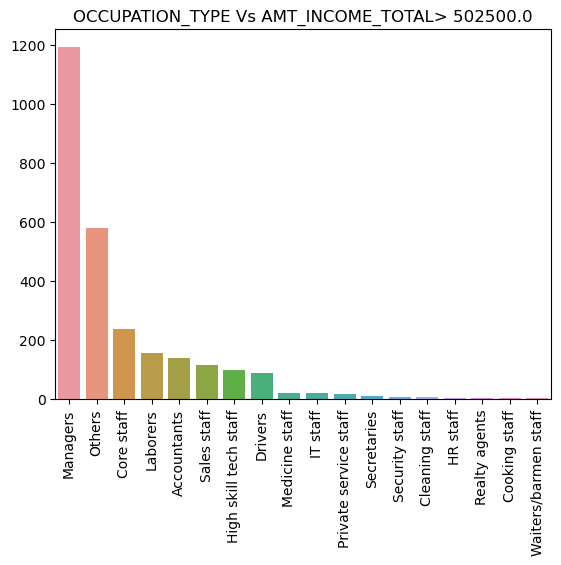

In [22]:
x=Apl_data['OCCUPATION_TYPE'][Apl_data['AMT_INCOME_TOTAL']> 502500.0].value_counts().index
y=Apl_data['OCCUPATION_TYPE'][Apl_data['AMT_INCOME_TOTAL']> 502500.0].value_counts().values
sns.barplot(x=x,y=y)
plt.xticks(rotation=90)
plt.title('OCCUPATION_TYPE Vs AMT_INCOME_TOTAL> 502500.0')

plt.show()

In [23]:
#Looking the rate on the defaulter
Apl_data['TARGET'][Apl_data['AMT_INCOME_TOTAL']> 502500.0].value_counts()
##income is very high still they are defaulty now those are the point to be analyses further

0    2556
1     146
Name: TARGET, dtype: int64

#### Showing the way how to capp but not executing it

AFTER REMOVING THE OUTLIERS


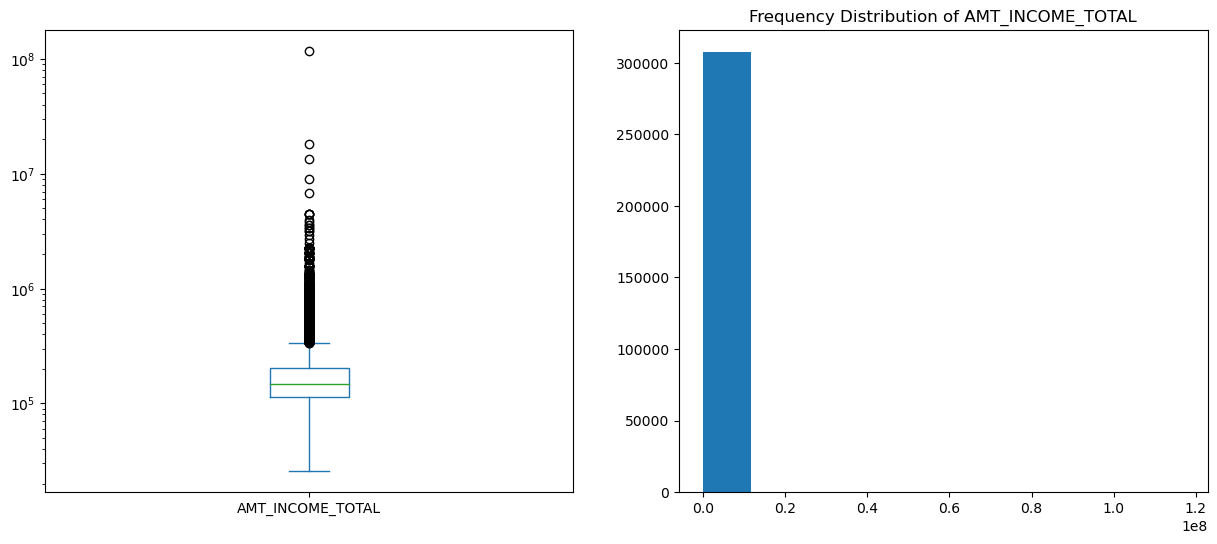

In [60]:
def Capping_Outliers(i):## one way to deal with OUTLIER is to CAP created function to capping  to IQR the outlier 

    q1=Apl_data[i].describe()['25%']
    q3=Apl_data[i].describe()['75%']
    iqr=q3-q1
    lb=q1-1.5*iqr
    ub=q3+1.5*iqr
    Apl_data[i]=np.where(Apl_data[i]<lb,lb,Apl_data[i])
    Apl_data[i]=np.where(Apl_data[i]>ub,ub,Apl_data[i])
    return Apl_data[i]

plt.figure(figsize=[15,6])
#Capping_Outliers('AMT_INCOME_TOTAL')## removing Outlier for the purpose of analysis but will not do
plt.subplot(1,2,1)
Apl_data.AMT_INCOME_TOTAL.plot.box()
plt.yscale('log')
#sns.boxplot(Apl_data.AMT_INCOME_TOTAL)#np.quantile(0,0.25,0.5,0.75,0.90))

print("AFTER REMOVING THE OUTLIERS")
plt.subplot(1,2,2)
plt.hist(Apl_data.AMT_INCOME_TOTAL)
#but in the small range in the begning and from the box plot i
plt.title("Frequency Distribution of "+'AMT_INCOME_TOTAL')
plt.show()

#### DAYS_EMPLOYED,DAYS_BIRTH(DAYS_BIRTH,DAYS_EMPLOYED,having -ive value and converting in to years and take in to AGE Column and )



In [25]:
#observation :--> 1st for the days days cannot be in negative 
#and for better and easy of analysis changing it in to no of years
#will be better

Days_var=['DAYS_BIRTH','DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH','DAYS_LAST_PHONE_CHANGE',]
## changing to +ive
for i in Days_var:
    print(Apl_data[i].describe())
    Apl_data[i]=Apl_data[i].apply(lambda x: abs(x) if x<0 else x )
    print('After Conversion---------------------')
    print(Apl_data[i].describe())


count    307511.000000
mean     -16036.995067
std        4363.988632
min      -25229.000000
25%      -19682.000000
50%      -15750.000000
75%      -12413.000000
max       -7489.000000
Name: DAYS_BIRTH, dtype: float64
After Conversion---------------------
count    307511.000000
mean      16036.995067
std        4363.988632
min        7489.000000
25%       12413.000000
50%       15750.000000
75%       19682.000000
max       25229.000000
Name: DAYS_BIRTH, dtype: float64
count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64
After Conversion---------------------
count    307511.000000
mean      67724.742149
std      139443.751806
min           0.000000
25%         933.000000
50%        2219.000000
75%        5707.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64
count    307511.000000
mean      -4986.120328
std 

In [26]:
#chaning in to years:
#for i in Days_var:Days_var=['DAYS_BIRTH','DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH','DAYS_LAST_PHONE_CHANGE',]
Apl_data['AGE']=Apl_data['DAYS_BIRTH'].apply(lambda x: x/365 )
Apl_data['YEAR_EMPLOYED']=Apl_data['DAYS_EMPLOYED'].apply(lambda x: x/365 )##
Apl_data['MONTH_REGISTRATION']=Apl_data['DAYS_REGISTRATION'].apply(lambda x: x/12 )
Apl_data['MONTH_ID_PUBLISH']=Apl_data['DAYS_ID_PUBLISH'].apply(lambda x: x/12 )
Apl_data['MONTH_LAST_PHONE_CHANGE']=Apl_data['DAYS_LAST_PHONE_CHANGE'].apply(lambda x: x/12 )


In [27]:
#dropping Culumn after modification
Apl_data.drop(['DAYS_BIRTH','DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH','DAYS_LAST_PHONE_CHANGE'],axis=1,inplace=True)

In [28]:
Apl_data.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCL

### making buckets for AGE columns

In [29]:
Apl_data.AGE.nunique()## for better analysis changing age in to categories
Apl_data["AGE_GROUP"]=pd.cut(Apl_data.AGE,[0, 30, 40, 50, 60, 9999], labels= ["<30","30-40","40-50","50-60","60+"])

In [30]:
Apl_data["AGE_GROUP"].value_counts()
##it have no outliers


30-40    82308
40-50    76541
50-60    68062
<30      45021
60+      35579
Name: AGE_GROUP, dtype: int64

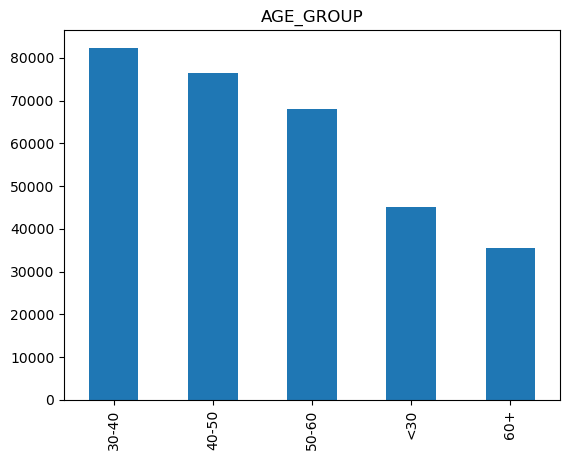

In [31]:
Apl_data["AGE_GROUP"].value_counts().plot.bar()
plt.title("AGE_GROUP")

plt.show()
## most loans are of 30-40  and 40-50 age group

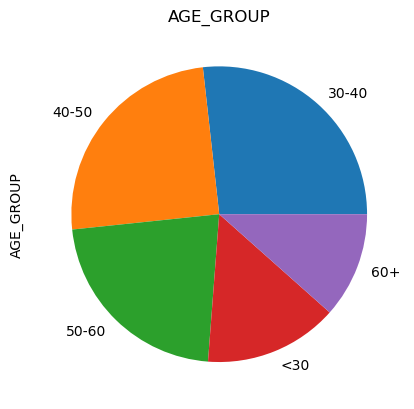

In [32]:
Apl_data["AGE_GROUP"].value_counts().plot.pie()
plt.title("AGE_GROUP")

plt.show()

In [33]:
Apl_data['YEAR_EMPLOYED'].value_counts()

1000.665753    55374
0.547945         156
0.613699         152
0.630137         151
0.545205         151
               ...  
38.249315          1
32.402740          1
27.879452          1
25.915068          1
23.819178          1
Name: YEAR_EMPLOYED, Length: 12574, dtype: int64

#1000.665753    18%, year employed can not be 1000 so analysing it further let see where and what he work
#it have outliers  no is to huge and cannot drop them 18% 
#Apl_data.groupby(by=['NAME_INCOME_TYPE'])['YEAR_EMPLOYED'].count()
##


In [34]:
#Let see where they work NAME_INCOME_TYPE	Clients income type (businessman, working, maternity leave,…)

Apl_data['NAME_INCOME_TYPE'][Apl_data['YEAR_EMPLOYED']>1000].value_counts()

Pensioner     55352
Unemployed       22
Name: NAME_INCOME_TYPE, dtype: int64

In [35]:
Apl_data.groupby(by=['NAME_INCOME_TYPE'])['YEAR_EMPLOYED'].count()

NAME_INCOME_TYPE
Businessman                 10
Commercial associate     71617
Maternity leave              5
Pensioner                55362
State servant            21703
Student                     18
Unemployed                  22
Working                 158774
Name: YEAR_EMPLOYED, dtype: int64

### making buckets from EMPlOYED_GROUP columns

In [36]:
Apl_data["YR_EMPlOYED_GROUP"]=pd.cut(Apl_data.YEAR_EMPLOYED,[0,0.6,1,10,20,30, 9999], labels= ["<1/2yr","1yr","<10yr","<20yr","<30yr",">30yr"])
#print(Apl_data2.pivot_table(index=['OCCUPATION_TYPE'],columns=['YEAR_EMPLOYED'],aggfunc='count'))

In [37]:
Apl_data["YR_EMPlOYED_GROUP"]

0         <10yr
1         <10yr
2           1yr
3         <10yr
4         <10yr
          ...  
307506      1yr
307507    >30yr
307508    <30yr
307509    <20yr
307510    <10yr
Name: YR_EMPlOYED_GROUP, Length: 307511, dtype: category
Categories (6, object): ['<1/2yr' < '1yr' < '<10yr' < '<20yr' < '<30yr' < '>30yr']

Text(0.5, 1.0, 'YR_EMPlOYED_GROUP')

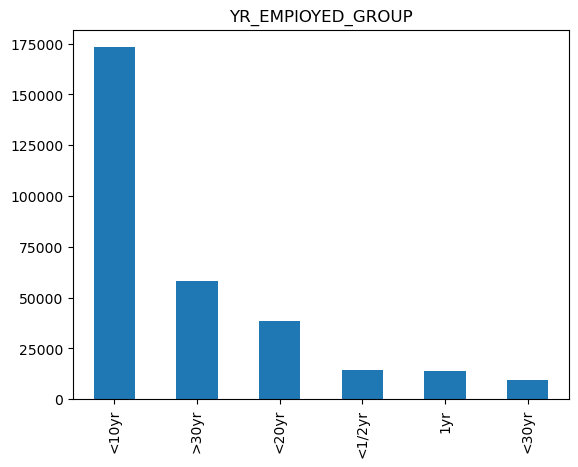

In [38]:
Apl_data["YR_EMPlOYED_GROUP"].value_counts().plot.bar()
plt.title('YR_EMPlOYED_GROUP')
#higher client are having less than 1-5 year exp

In [39]:
#now the AGE and YEAR_EMPLOYED are CATEGORICAL Variable

In [40]:
cont_var_req=['AMT_INCOME_TOTAL','AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE']
## drop  othere cont var (whcih was not required also make required -ive and yr/month changes)

##'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE are skewd to left side ##'AMT_INCOME_TOTAL' have high value which are outlier

## CATEGORICAL ANALYSIS

In [41]:
for i in cat_var:
    print("value_counts of "+i)
    print(Apl_data[i].value_counts(normalize=True))
    print('describe of'+i)
    print(Apl_data[i].describe())
  

value_counts of TARGET
0    0.919271
1    0.080729
Name: TARGET, dtype: float64
describe ofTARGET
count    307511.000000
mean          0.080729
std           0.272419
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: TARGET, dtype: float64
value_counts of NAME_CONTRACT_TYPE
Cash loans         0.904787
Revolving loans    0.095213
Name: NAME_CONTRACT_TYPE, dtype: float64
describe ofNAME_CONTRACT_TYPE
count         307511
unique             2
top       Cash loans
freq          278232
Name: NAME_CONTRACT_TYPE, dtype: object
value_counts of CODE_GENDER
F      0.658344
M      0.341643
XNA    0.000013
Name: CODE_GENDER, dtype: float64
describe ofCODE_GENDER
count     307511
unique         3
top            F
freq      202448
Name: CODE_GENDER, dtype: object
value_counts of FLAG_OWN_CAR
N    0.659892
Y    0.340108
Name: FLAG_OWN_CAR, dtype: float64
describe ofFLAG_OWN_CAR
count     307511
unique         2
top            N
fr

count    307511.000000
mean         12.063419
std           3.265832
min           0.000000
25%          10.000000
50%          12.000000
75%          14.000000
max          23.000000
Name: HOUR_APPR_PROCESS_START, dtype: float64
value_counts of REG_REGION_NOT_LIVE_REGION
0    0.984856
1    0.015144
Name: REG_REGION_NOT_LIVE_REGION, dtype: float64
describe ofREG_REGION_NOT_LIVE_REGION
count    307511.000000
mean          0.015144
std           0.122126
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: REG_REGION_NOT_LIVE_REGION, dtype: float64
value_counts of REG_REGION_NOT_WORK_REGION
0    0.949231
1    0.050769
Name: REG_REGION_NOT_WORK_REGION, dtype: float64
describe ofREG_REGION_NOT_WORK_REGION
count    307511.000000
mean          0.050769
std           0.219526
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: REG_REGION_NOT_WORK_REGION, dty

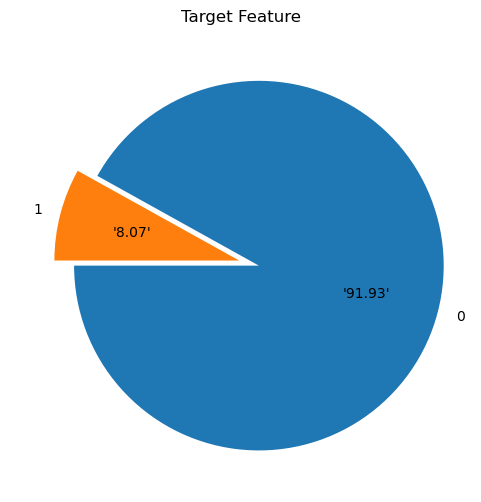

In [42]:
#plt.pie(x=Apl_data['TARGET'].value_counts(),)
plt.figure(figsize=[6,6])
label=Apl_data.TARGET.value_counts().index
plt.pie(Apl_data['TARGET'].value_counts(),labels=label,autopct="'%1.2f'",explode=[0.1,0.01],startangle=180)
plt.title('Target Feature')
plt.show()

### insight From the above graph insight 
1. Target Coulumn (Target =1) is higly imbalance 
Target variable (1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample, 0 - all other cases)


2. NAME_CONTRACT_TYPE:Identification if loan is cash or revolving
Cash loan is very high# but have no impact so dropping from analysis


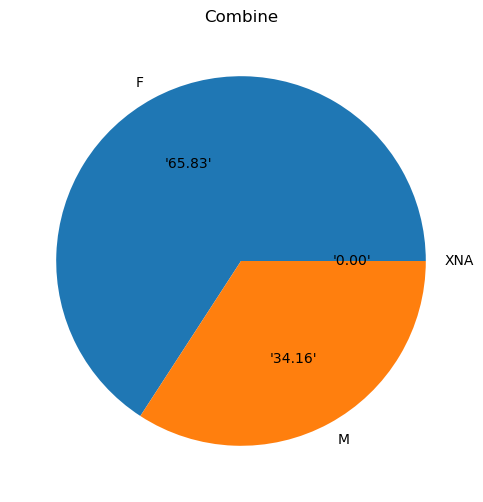

In [43]:
#3.Code_Gender:
plt.figure(figsize=[8,6])
plt.title("Combine")

label=Apl_data.CODE_GENDER.value_counts().index
plt.pie(Apl_data.CODE_GENDER.value_counts(),labels=label,autopct="'%1.2f'")
plt.show()




#### Code_Gender:--> Female ratio is very High more then 50% and XNA is wrongly input data which is not possible(only 4 in count so changin it to Mode value 

## Catagorical Data Analysis

In [44]:
#Apl_data.CODE_GENDER.value_counts(normalize=True)# as we can see the female ratio is very high ( and the xNA can be ignore so sintead  of droping it i am converting this in to females)
#Apl_data.replace(to_replace='XNA',value=mode,inplace=True)Leaving it as it is 
Apl_data[Apl_data=='XNA'].count().sort_values(ascending=False)
#ORGANIZATION_TYPE              55374 hve 'XNA'
Apl_data['CODE_GENDER'].replace('XNA',np.nan,inplace=True)##so that it wont reflacte in the calculation



In [45]:
Apl_data[Apl_data=='XNA'].count().sort_values(ascending=False)

ORGANIZATION_TYPE              55374
SK_ID_CURR                         0
FLAG_DOCUMENT_7                    0
FLAG_DOCUMENT_14                   0
FLAG_DOCUMENT_13                   0
FLAG_DOCUMENT_12                   0
FLAG_DOCUMENT_11                   0
FLAG_DOCUMENT_10                   0
FLAG_DOCUMENT_9                    0
FLAG_DOCUMENT_8                    0
FLAG_DOCUMENT_6                    0
OBS_30_CNT_SOCIAL_CIRCLE           0
FLAG_DOCUMENT_5                    0
FLAG_DOCUMENT_4                    0
FLAG_DOCUMENT_3                    0
FLAG_DOCUMENT_2                    0
DEF_60_CNT_SOCIAL_CIRCLE           0
OBS_60_CNT_SOCIAL_CIRCLE           0
FLAG_DOCUMENT_15                   0
FLAG_DOCUMENT_16                   0
FLAG_DOCUMENT_17                   0
FLAG_DOCUMENT_18                   0
AGE_GROUP                          0
MONTH_LAST_PHONE_CHANGE            0
MONTH_ID_PUBLISH                   0
MONTH_REGISTRATION                 0
YEAR_EMPLOYED                      0
A

In [46]:
plt.figure(figsize=[20,6])

print(Apl_data['ORGANIZATION_TYPE'].value_counts(normalize=True)*100)

#plt.figure(figsize=[10,10])

#Apl_data.groupby(by=['TARGET'])['ORGANIZATION_TYPE'].mean().plot.bar()


#

Business Entity Type 3    22.110429
XNA                       18.007161
Self-employed             12.491260
Other                      5.425172
Medicine                   3.639870
Business Entity Type 2     3.431747
Government                 3.383294
School                     2.891929
Trade: type 7              2.546576
Kindergarten               2.237318
Construction               2.185613
Business Entity Type 1     1.945947
Transport: type 4          1.755384
Trade: type 3              1.135569
Industry: type 9           1.095245
Industry: type 3           1.065978
Security                   1.055897
Housing                    0.961917
Industry: type 11          0.879318
Military                   0.856555
Bank                       0.815255
Agriculture                0.798020
Police                     0.761274
Transport: type 2          0.716722
Postal                     0.701438
Security Ministries        0.641928
Trade: type 2              0.617864
Restaurant                 0

<Figure size 2000x600 with 0 Axes>

<AxesSubplot: >

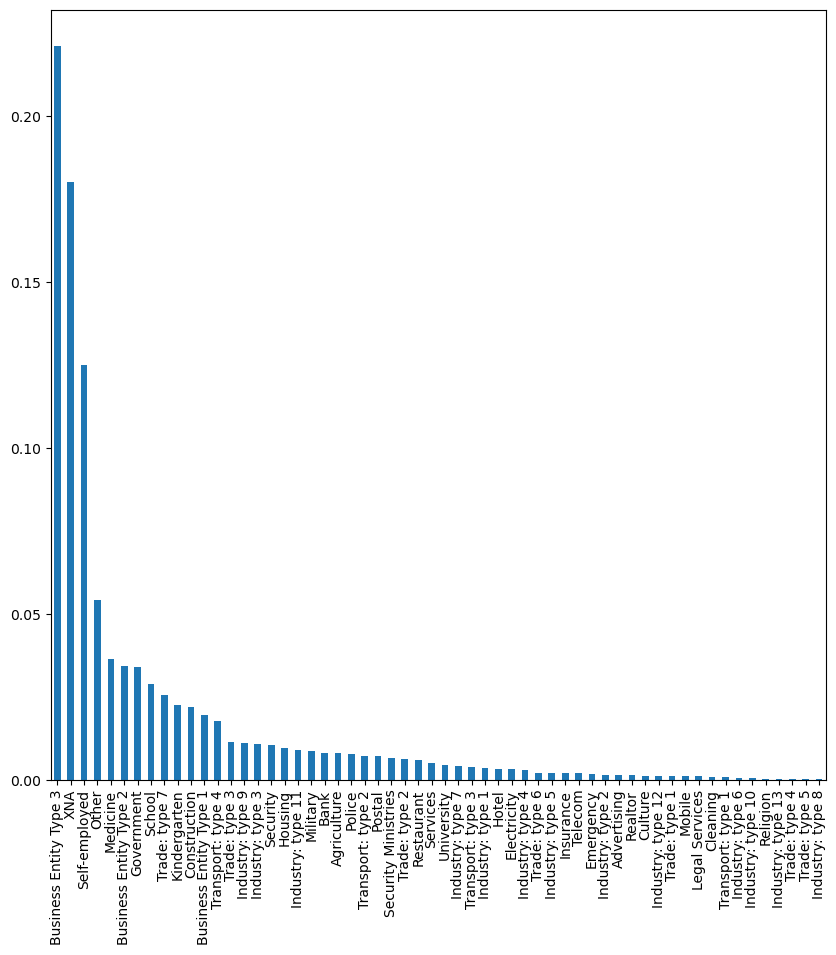

In [47]:
plt.figure(figsize=[10,10])
Apl_data['ORGANIZATION_TYPE'].value_counts(normalize=True).plot.bar()

0     70.036844
1     19.875387
2      8.698551
3      1.208737
4      0.139507
5      0.027316
6      0.006829
7      0.002276
14     0.000976
8      0.000650
9      0.000650
12     0.000650
10     0.000650
19     0.000650
11     0.000325
Name: CNT_CHILDREN, dtype: float64


<AxesSubplot: >

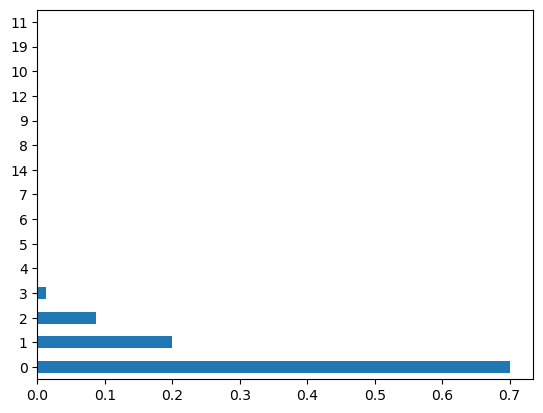

In [48]:
#4.CNT_CHILDREN :Number of children the client has
print(100*Apl_data.CNT_CHILDREN.value_counts(normalize=True))

Apl_data.CNT_CHILDREN.value_counts(normalize=True).plot.barh()
#100*Apl_data2.CNT_CHILDREN.value_counts(normalize=True)
#70% have 0 Children and 19 % 1 and 8% have 2 and so on 14 being the highest may be possible Need to analysis in Bivarient


Unaccompanied      81.238720
Family             13.056118
Spouse, partner     3.697429
Children            1.062401
Other_B             0.575589
Other_A             0.281616
Group of people     0.088127
Name: NAME_TYPE_SUITE, dtype: float64


<AxesSubplot: >

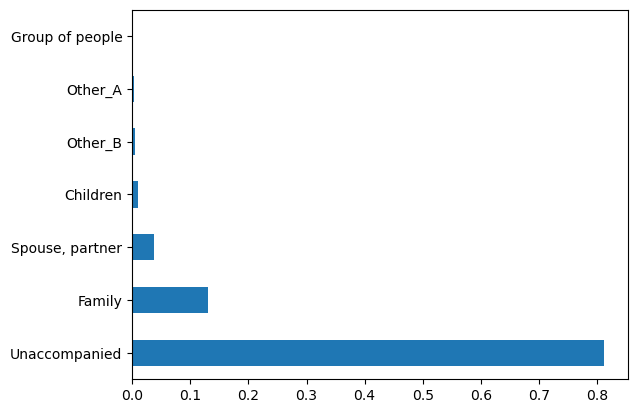

In [49]:
#NAME_TYPE_SUITE:Who was accompanying client when he was applying for the loan
print(100*Apl_data.NAME_TYPE_SUITE.value_counts(normalize=True))
Apl_data.NAME_TYPE_SUITE.value_counts(normalize=True).plot.barh()

## one can be accopaing with anyone so dropping it from analysis perspective

Working                 51.631974
Commercial associate    23.289248
Pensioner               18.003258
State servant            7.057634
Unemployed               0.007154
Student                  0.005853
Businessman              0.003252
Maternity leave          0.001626
Name: NAME_INCOME_TYPE, dtype: float64


<AxesSubplot: >

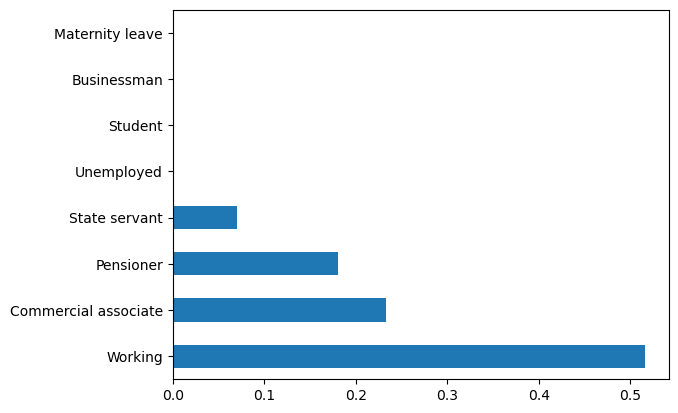

In [50]:
#NAME_INCOME_TYPE:Clients income type (businessman, working, maternity leave,…)
print(100*Apl_data.NAME_INCOME_TYPE.value_counts(normalize=True))
Apl_data.NAME_INCOME_TYPE.value_counts(normalize=True).plot.barh()

## can have links with Days Employed
#and Employement type as per the risk management it is one of the imp factor.


Secondary / secondary special    71.018923
Higher education                 24.344820
Incomplete higher                 3.341994
Lower secondary                   1.240931
Academic degree                   0.053331
Name: NAME_EDUCATION_TYPE, dtype: float64


<AxesSubplot: >

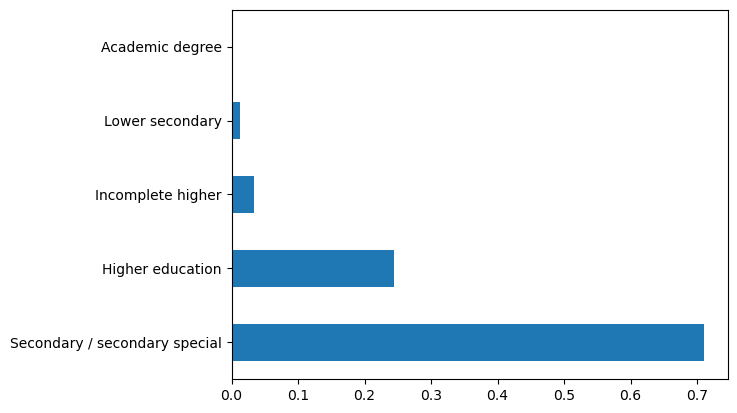

In [51]:
#NAME_EDUCATION_TYPE:Clients income type (businessman, working, maternity leave,…)
print(100*Apl_data.NAME_EDUCATION_TYPE.value_counts(normalize=True))
Apl_data.NAME_EDUCATION_TYPE.value_counts(normalize=True).plot.barh()
## can have links with Days Employed
#and Education type as per the risk management it is one of the imp factor.


In [52]:
#NAME_FAMILY_STATUS#NAME_HOUSING_TYPE#OCCUPATION_TYPE#CNT_FAM_MEMBERS



<AxesSubplot: ylabel='REGION_RATING_CLIENT,TARGET'>

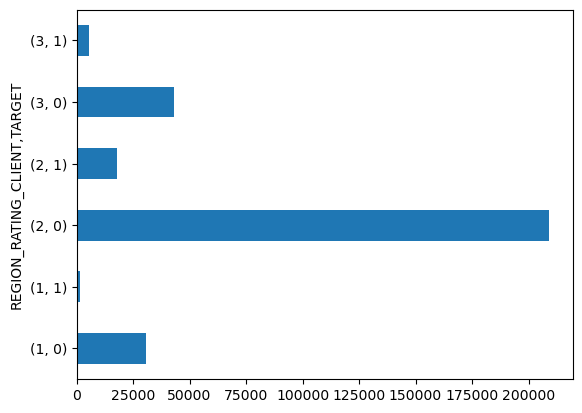

In [53]:
#Flag mobile, phone and all have no impact on the target variable so droppin from analysis
#N    0.694824Y    0.305176## target=1
#N    0.656824Y    0.343176##target=0 same valurs
#Region Rating_client, Region Rating_client w_city seems to have low count  high implact
Apl_data.groupby(by=['REGION_RATING_CLIENT','TARGET'])['SK_ID_CURR'].count().plot.barh()

#from the grapgh we can say the region 2 gave high default rate but it has high no of loaner who have no issue. so dropping these also from Analysis

In [54]:
cat_var_req=['TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER','CNT_CHILDREN', 'NAME_TYPE_SUITE','AGE_GROUP',
       "YR_EMPlOYED_GROUP",'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS','NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE'
        ,'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS','ORGANIZATION_TYPE','AMT_REQ_CREDIT_BUREAU_YEAR']
#REMOVING
#FLAG all var stat from flag,FLAG_OWN_REALTY,FLAG DOC2-12 just for the analysis purpose so far donot find any relation


## Bivariate Anlysis



#### Cont VS Cont

In [55]:
Apl_data[cont_var_req].corr()

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE
AMT_INCOME_TOTAL,1.000000,0.156870,0.191657,0.159632
AMT_CREDIT,0.156870,1.000000,0.770127,0.986734
AMT_ANNUITY,0.191657,0.770127,1.000000,0.774837
AMT_GOODS_PRICE,0.159632,0.986734,0.774837,1.000000


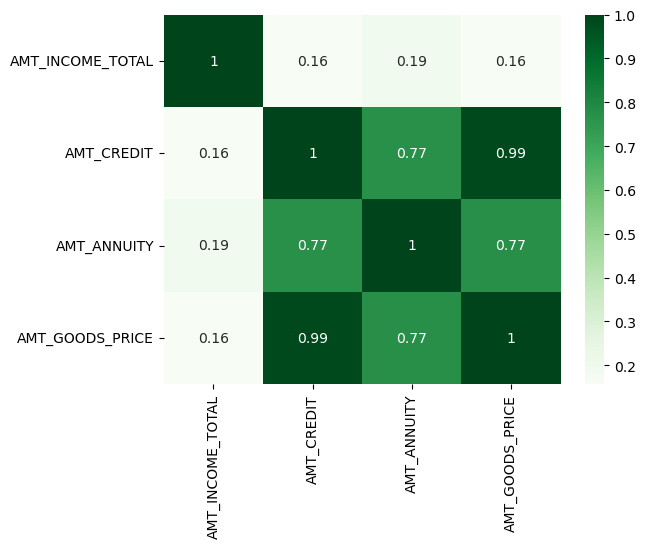

In [56]:
sns.heatmap(Apl_data[cont_var_req].corr(),annot=True,cmap='Greens')
plt.show()

 #### AMT_CREDIT have high corelation with the AMT_GOOD_PRICE()0.99 and with Amt_ANNUITY(0.77 
  
  
  ## cont_var_req=['AMT_INCOME_TOTAL','AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE']

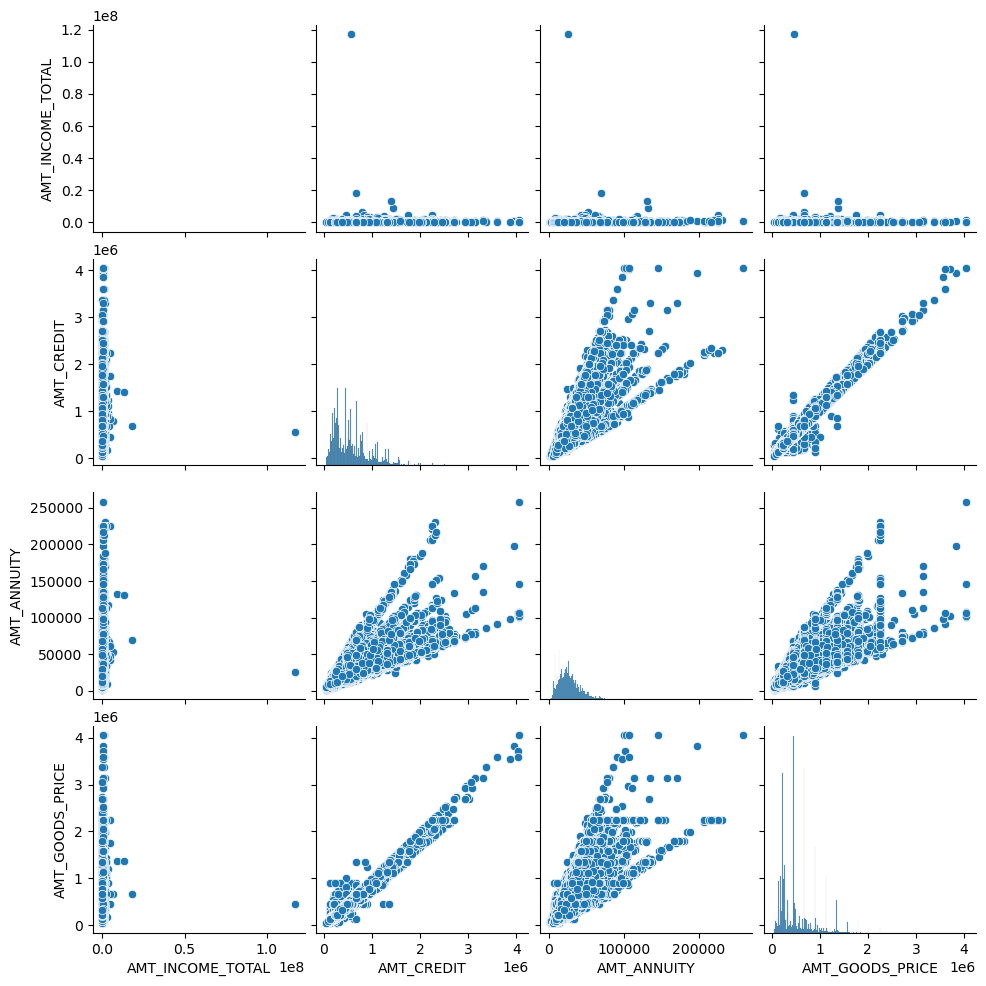

In [57]:
sns.pairplot(data=Apl_data,vars=cont_var_req)
plt.show()

#### CAT Vs Cont

TypeError: barplot() takes from 0 to 1 positional arguments but 2 were given

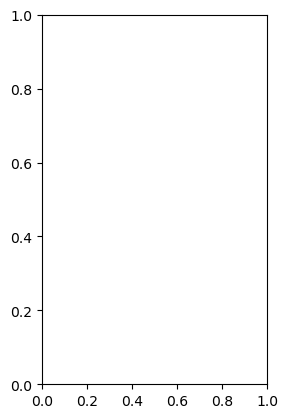

In [58]:
for x in cat_var_req:
    for y in cont_var_req:
        plt.subplot(1,2,1)
        sns.barplot(Apl_data[x],Apl_data[y])
        plt.xlabel(x)
        plt.title("Distribution of "+x+" Vs "+y)
        plt.xticks(rotation=45)
        plt.show()

In [ ]:
cat_var_req=['NAME_CONTRACT_TYPE', 'CODE_GENDER','CNT_CHILDREN', 'NAME_TYPE_SUITE','AGE_GROUP',
       "YR_EMPlOYED_GROUP",'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS','NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE'
        ,'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS','ORGANIZATION_TYPE','FLAG_DOCUMENT_2','AMT_REQ_CREDIT_BUREAU_YEAR']

#### TARGET VS Cont Var

#cont_var_req=['AMT_INCOME_TOTAL','AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE']

In [ ]:
## from univariate we  know the data is very skewed so using quentile
for i in cont_var_req:
    print(Apl_data.groupby(by='TARGET')[i].aggregate(['mean','median']))
    print(i)
   # print(Apl_data.groupby(by='TARGET')[i].median())


In [ ]:
for i in cont_var_req:
    sns.boxplot(data=Apl_data,x='TARGET',y=i)
    plt.title("Relationship of "+i+"\n Vs \n"+' TARGET')
    plt.show()

In [ ]:
def q75(x):
    return np.quantile(x,0.75)
for i in cont_var_req:
    print(Apl_data.groupby(by='TARGET')[i].aggregate(['mean','median',q75]))
    Apl_data.groupby(by='TARGET')[i].aggregate(['mean','median',q75]).plot.bar()
    plt.title("Relationship of "+i+"\n Vs \n"+' TARGET')
    plt.show()
   # print(Apl_data.groupby(by='TARGET')[i].median())

#### Catvs Cat vs Target

In [ ]:

for x in cat_var_req:
    plt.figure(figsize=[10,8])
    plt.subplot(1,2,1)
    sns.countplot(data=data,x=x,hue='TARGET')
    plt.title(x+' Vs TARGET')
    #plt.label()
    plt.xticks(rotation=75)
    
    plt.subplot(1,2,2)
    sns.barplot(data=Apl_data,x=x,y='TARGET')
    plt.xticks(rotation=75)
    plt.show()

In [ ]:

for x in cat_var_req:
    plt.figure(figsize=[10,8])
    plt.subplot(1,2,1)
    sns.countplot(data=Apl_data,x=x,hue='TARGET')
    plt.title(x+' Vs TARGET')
    #plt.label()
    plt.xticks(rotation=75)
    
    plt.subplot(1,2,2)
    sns.barplot(data=Apl_data,x=x,y='TARGET')
    plt.xticks(rotation=75)
    plt.show()

- 
**Cash loan have more defaulter(0.083459) ,

>>As compare to female Males are at defaluter F:0.069993 M  0.101419

>>Client who have less kids are more like to repay as compare to the kids more than 2(3 : 0.096314, 4     0.128205

>>As the AGE increase Client is mst like to do less faluty, client below than 30 years of age likely to do more fault

>>client having less experience are more like to be at fault, as the experince increase clinet more likely to repay loan

>> Client who are UNEMPLYED and Unemployed              0.363636
Maternity leave         0.400000  ratio of them to be defaulter are very high

>>as the Education level increase clients are more likely to repay loan

>>Single / not married    0.098077,Civil marriage          0.099446

>>Office Appartment  ppl are most likely to repay.
>>
Laborers                 0.105788
Low-skill Laborers       0.171524
Drivers                  0.113261
Cooking staff            0.104440
Security staff           0.107424
Waiters/barmen staff     0.112760
>> labour class are highre defaulter rate
Accountants and manager are most likely to repay 
>> check for doccumnets
>>AMT_REQ_CREDIT_BUREAU:: Higer the number of request higer the chance of client to be at Fault.


In [ ]:
CAT vs CAT

In [ ]:
for x in cat_var_req:
    for y in cat_var_req:
        if x!=y:

            plt.figure(figsize=[10,8])
            plt.subplot(1,2,1)
            sns.countplot(data=Apl_data,x=x,hue=y)
            plt.title(x+' Vs '+y)
            #plt.label()
            plt.xticks(rotation=75)

            plt.show()

## MULTIVARIATE PLOTS

In [ ]:
Apl_data.pivot_table( index=['NAME_EDUCATION_TYPE'], columns=["NAME_INCOME_TYPE"], values="TARGET")

for i in cat_var_req:
    for j in cat_var_req:
            if i != j:
                result=Apl_data.pivot_table(index=[i], columns=[j], values="TARGET")
                sns.heatmap(data=result,annot=True,cmap='RdYlGn')

In [ ]:
result=Apl_data.pivot_table( index=['NAME_EDUCATION_TYPE'], columns=["NAME_INCOME_TYPE"], values="TARGET")

In [ ]:
sns.heatmap(data=result,annot=True,cmap='RdYlGn')

In [ ]:
result=Apl_data.pivot_table( index=['NAME_EDUCATION_TYPE'], columns=["NAME_HOUSING_TYPE"], values="TARGET")

In [ ]:
plt.figure(figsize=[10,6])
sns.heatmap(data=result,cmap='RdYlGn',annot=True)
plt.show()

In [ ]:
result=Apl_data.pivot_table( index=['NAME_EDUCATION_TYPE'], columns=["NAME_FAMILY_STATUS"], values="TARGET")

In [ ]:
plt.figure(figsize=[10,6])
sns.heatmap(data=result,cmap='RdYlGn',annot=True)
plt.show()

In [ ]:
result=Apl_data.pivot_table( index=['NAME_EDUCATION_TYPE'], columns=["OCCUPATION_TYPE"], values="TARGET")

In [ ]:
plt.figure(figsize=[10,6])
sns.heatmap(data=result,cmap='RdYlGn',annot=True)
plt.show()

In [ ]:
result=Apl_data.pivot_table( index=['NAME_EDUCATION_TYPE'], columns=["AGE_GROUP"], values="TARGET")
plt.figure(figsize=[10,6])
sns.heatmap(data=result,cmap='RdYlGn',annot=True)
plt.show()

In [ ]:
result=Apl_data.pivot_table( index=['NAME_EDUCATION_TYPE'], columns=["YR_EMPlOYED_GROUP"], values="TARGET")
plt.figure(figsize=[10,6])
sns.heatmap(data=result,cmap='RdYlGn',annot=True)
plt.show()

In [ ]:

Res1=Apl_data.pivot_table( index=['ORGANIZATION_TYPE'], columns=["OCCUPATION_TYPE"], values="TARGET")

In [ ]:
plt.figure(figsize=[20,20])
sns.heatmap(data=Res1,cmap='RdYlGn',annot=True)
plt.show()

In [ ]:
Apl_data.pivot_table(columns=['CODE_GENDER'], index=["OCCUPATION_TYPE"], values="TARGET")

In [ ]:
Res3=Apl_data_updated.pivot_table( columns=['CODE_GENDER'], index=["OCCUPATION_TYPE"], values="TARGET")


In [ ]:
sns.heatmap(data=Res3,cmap='Greens',annot=True)

In [ ]:

Apl_data_updated.corr()
Data_corr=Apl_data_updated.corr()

In [ ]:
sns.heatmap(data=Data_corr,cmap='Greens',annot=True)

In [ ]:

cont_var_req=['SK_ID_CURR','AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE']
cat_var_req=['NAME_CONTRACT_TYPE','TARGET', 'CODE_GENDER', 'CNT_CHILDREN', 'AGE_GROUP', 'YR_EMPlOYED_GROUP', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'ORGANIZATION_TYPE','FLAG_DOCUMENT_2', 'AMT_REQ_CREDIT_BUREAU_YEAR']
columns_var=cont_var_req+cat_var_req 
len(columns_var)

In [ ]:
Apl_data_updated=Apl_data[columns_var]

In [ ]:
#sns.heatmap(Apl_data_updated,annot=True,cmap='RdYlGn')##

In [ ]:
Apl_data_updated.head()

In [ ]:
Apl_data_updated.shape

## Analysisng second data base
#Previous_Apllication_data contains information about the client’s previous loan data. (NameContract Status) #It contains the data on whether the previous application had been Approved, Cancelled, Refused or Unused offer.#Code_reject_Reson

In [ ]:
Previous_Apl_data=pd.read_csv('previous_application.csv')
Previous_Apl_data.shape#(1670214, 37)
Previous_Apl_data.info()


In [ ]:
Previous_Apl_data[Previous_Apl_data['SK_ID_CURR']==187868].head()
## CODE_REJECT_REASON,NAME_CONTRACT_STATUS, NAME_CLIENT_TYPE,(need to observe more on this CHANNEL_TYPE)
#as per the requierment only these i FIND use full as rest details are of  so dropping all other from the Analysing point


In [ ]:
Previous_Apl_data.duplicated().sum()

## Handling Miising Data

In [ ]:
100*Previous_Apl_data.isnull().mean().sort_values(ascending=False)
## checking Null value

In [ ]:
Null_Col=[column for column in Previous_Apl_data.columns if (100*Previous_Apl_data[column].isnull().mean()>40)]
Null_Col

## Dropping Null value collumn whose data more than 40%

In [ ]:
Previous_Apl_data.drop(columns=Null_Col,axis=1,inplace=True)

In [ ]:
100*Previous_Apl_data.isnull().mean().sort_values(ascending=False)

## IMPUTING the Remaining  MISSING Values<40 
leaving it as it is but we can imput it with mode for categotical variable and also median in continous varaible

In [ ]:
Null_Col=[columns for columns in Previous_Apl_data.columns if Previous_Apl_data[columns].isnull().mean()>0]
Null_Col

In [ ]:
Previous_Apl_data.nunique().sort_values()

In [ ]:
Previous_Apl_data.CNT_PAYMENT.unique()

In [ ]:
Null_Cont_Var=['AMT_ANNUITY', 'AMT_CREDIT', 'AMT_GOODS_PRICE']
Null_Cat_Var=['CNT_PAYMENT']

In [ ]:
## IMPUTING the NA of continuous( dtype!=object ) variable with the MEDIAN
for column in Null_Cont_Var :
    if (Previous_Apl_data[column].dtype!=object) & (Previous_Apl_data[column].isnull().mean()*100!=0):
        #print(column)
        Median_value=Previous_Apl_data[column].median()
        #print(Median_value)
        Previous_Apl_data[column]=Previous_Apl_data[column].fillna(Median_value)  

In [ ]:
Mode_value=Previous_Apl_data['CNT_PAYMENT'].mode()[0]
Previous_Apl_data['CNT_PAYMENT']=Previous_Apl_data['CNT_PAYMENT'].fillna(Mode_value,axis=0)

In [ ]:
100*Previous_Apl_data.isnull().mean().sort_values(ascending=False)

## Outlier Analysis:-->Value that is beyound normal value

In [ ]:
Prev_Cont_var=['AMT_ANNUITY','AMT_APPLICATION','AMT_CREDIT','AMT_GOODS_PRICE' ]


Prev_Cat_var=['NAME_CONTRACT_TYPE' ,'NAME_CONTRACT_STATUS','CODE_REJECT_REASON',
              'NAME_CLIENT_TYPE']

## Univariate Analysis on continous var for outlier ploting box plot

In [ ]:

for i in Prev_Cont_var:
    plt.figure(figsize=[8,5])
    print('*'*60)
    print('Analysing outliers for ',i)
    print('*'*60)
    print(Previous_Apl_data[i].describe().apply(lambda x: format(x,'f')))
    print('*'*60)
    plt.subplot(1,2,1)
    sns.boxplot(Previous_Apl_data[i])
    plt.title(i)
    plt.subplot(1,2,2)
    sns.histplot(Previous_Apl_data[i])
    plt.title(i)
   
    
    plt.show()

these can have outlier i m not imputing 

## Univariate Analysis 

In [ ]:

Previous_Apl_data['SK_ID_CURR'].value_counts()


In [ ]:
Previous_Apl_data[Previous_Apl_data['SK_ID_CURR']==187868]

In [ ]:
Previous_Apl_data['NAME_CONTRACT_STATUS'].value_counts(normalize=True)*100

In [ ]:
plt.figure(figsize=[10,6])
Previous_Apl_data['NAME_CONTRACT_STATUS'].value_counts(normalize=True).plot.pie()
plt.legend(Previous_Apl_data['NAME_CONTRACT_STATUS'].value_counts(normalize=True)*100)
plt.show()

In [ ]:
data=Previous_Apl_data['CODE_REJECT_REASON'].value_counts(normalize=True)*100

#Previous_Apl_data['CODE_REJECT_REASON'].value_counts(normalize=True).plot.barh()
data.plot.bar()

print(data)
plt.legend(data)
plt.show()

In [ ]:
plt.figure(figsize=[10,6])
x=Previous_Apl_data['CODE_REJECT_REASON'].value_counts(normalize=True).values
label=Previous_Apl_data['CODE_REJECT_REASON'].value_counts(normalize=True).index
plt.pie(data=data,x=x,labels=label,autopct='%1.2f')
plt.show()

#XAP is not null value it is the data with respect to the Aproved Client so it not applicalbe 
data

reject of oam high in HC categories , and in limit catacory.

## CATEGORICAL VAR

In [ ]:
for i in Prev_Cat_var:
    print("value_counts of "+i)
    print(Previous_Apl_data[i].value_counts(normalize=True))
    Previous_Apl_data[i].value_counts(normalize=True).plot.barh()
    print('describe of'+i)
    print(Previous_Apl_data[i].describe())
    print("value_counts of "+i)
    plt.show()
 

                              

## Bivariate Analysis

### cat vs cat NAME_CONTRACT_STATUS

In [ ]:
for x in Prev_Cat_var:
    plt.figure(figsize=[10,8])
    plt.subplot(1,2,1)
    sns.countplot(data=Previous_Apl_data,x=x,hue='NAME_CONTRACT_STATUS')
    plt.title(x+' Vs NAME_CONTRACT_STATUS')
    #plt.label()
    plt.xticks(rotation=75)
    plt.show()

In [ ]:
Prev_Col=['SK_ID_CURR','NAME_CONTRACT_TYPE' ,'NAME_CONTRACT_STATUS','CODE_REJECT_REASON','NAME_CLIENT_TYPE']
#Previous_Apl_data.columns## these i find requierd column

Previous_Apl_data_updated=Previous_Apl_data[Prev_Col]

In [ ]:
Previous_Apl_data_updated.head()

## Merging both the data base

In [ ]:
Apl_data_updated=pd.merge(Apl_data_updated,Previous_Apl_data_updated , on='SK_ID_CURR',how='left')

In [ ]:
Apl_data_updated.columns

In [ ]:
cat_var_upd=['NAME_CONTRACT_TYPE_x', 'TARGET', 'CODE_GENDER',
       'CNT_CHILDREN', 'AGE_GROUP', 'YR_EMPlOYED_GROUP', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'OCCUPATION_TYPE', 'ORGANIZATION_TYPE', 'FLAG_DOCUMENT_2',
       'AMT_REQ_CREDIT_BUREAU_YEAR', 'NAME_CONTRACT_TYPE_y',
       'NAME_CONTRACT_STATUS', 'CODE_REJECT_REASON' ,'NAME_CLIENT_TYPE']

cont_var_upd=['AMT_INCOME_TOTAL','AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE']
cloumn_update=cat_var_upd+cont_var_upd

In [ ]:
Apl_data_updated.info()

TARGET VS Previous DATA FRAME 

In [ ]:
sns.barplot(data=Apl_data_updated,x='CODE_REJECT_REASON',y='TARGET')
plt.show()

### Client whose loan got reject due to SCOFR are the highest defaulter 

In [ ]:
sns.barplot(data=Apl_data_updated,x='NAME_CONTRACT_STATUS',y='TARGET')

### Client whose Loan got Refused  and canceled earlier are likely to be a defaulter 

In [ ]:
sns.countplot(data=Apl_data_updated,x='NAME_CLIENT_TYPE',hue='TARGET')

In [ ]:
sns.barplot(data=Apl_data_updated,x='NAME_CLIENT_TYPE',y='TARGET')
plt.show()

In [ ]:
sns.countplot(data=Apl_data_updated,x='CODE_GENDER',hue='NAME_CONTRACT_STATUS')


In [ ]:
cat_var_upd=['NAME_CONTRACT_TYPE_x', 'TARGET', 'CODE_GENDER',
       'CNT_CHILDREN', 'AGE_GROUP', 'YR_EMPlOYED_GROUP', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'OCCUPATION_TYPE', 'ORGANIZATION_TYPE', 'FLAG_DOCUMENT_2',
       'AMT_REQ_CREDIT_BUREAU_YEAR', 'NAME_CONTRACT_TYPE_y',
       'NAME_CONTRACT_STATUS', 'CODE_REJECT_REASON' ,'NAME_CLIENT_TYPE']

In [ ]:
#Cat Vs NAME_CONTRACT_STATUS 

for i in cat_var_upd:
    sns.countplot(data=Apl_data_updated,x=i,hue='NAME_CONTRACT_STATUS')
    plt.xticks(rotation=75)
    plt.show()

## what ever is analysd in the Application data Frame it is same i got after the merging,same approved rate are high ,


In [ ]:
100*Apl_data_updated.isnull().mean().sort_values(ascending=False)

In [ ]:
Apl_data_updated[Apl_data_updated['NAME_CONTRACT_STATUS']!='Approved'].head()

In [ ]:
#CatvsCat
#Target Vs NAME_CONTRACT_STATUS 
data=Apl_data_updated[Apl_data_updated['NAME_CONTRACT_STATUS']!='Approved']
sns.countplot(data=data,x='NAME_CONTRACT_STATUS',hue='TARGET')

In [ ]:
Apl_data_updated[Apl_data_updated['CODE_REJECT_REASON']!='XAP'].head()

In [ ]:
#Target Vs NAME_CONTRACT_STATUS 
data=Apl_data_updated[Apl_data_updated['CODE_REJECT_REASON']!='XAP']
sns.countplot(data=data,x='CODE_REJECT_REASON',hue='NAME_CONTRACT_STATUS')

In [ ]:
data=Apl_data_updated[Apl_data_updated['CODE_REJECT_REASON']!='XAP']
sns.countplot(data=data,x='CODE_REJECT_REASON',hue='TARGET')

In [ ]:
Apl_data_updated[cloumn_update].corr()
Final_Res=Apl_data_updated[cloumn_update].corr()

In [ ]:
sns.heatmap(data=Final_Res,cmap='Greens')